# Проект по Предобработке данных:<br>**«Исследование надежности заемщиков»**


**Задание:**<br>
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.<br>
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Описание данных:**<br>
`children` — количество детей в семье<br>
`days_employed` — общий трудовой стаж в днях<br>
`dob_years` — возраст клиента в годах<br>
`education` — уровень образования клиента<br>
`education_id` — идентификатор уровня образования<br>
`family_status` — семейное положение<br>
`family_status_id` — идентификатор семейного положения<br>
`gender` — пол клиента<br>
`income_type` — тип занятости<br>
`debt` — имел ли задолженность по возврату кредитов<br>
`total_income` — ежемесячный доход<br>
`purpose` — цель получения кредита

## Подготовка

**Импорт библиотек**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Импорт и анализ датафрейма**

In [2]:
data = pd.read_csv('/datasets/data.csv')

Первые 20 строчек датафрейма:

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Основная информация о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

**Обработка пропусков**

In [5]:
data.isna().sum()

,0
children,0
days_employed,2174
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


В двух столбцах есть пропущенные значения, в `days_employed` и в `total_income`. `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`.

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

**Обработка аномальных значений**

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Заменим все отрицательные значения положительными с помощью метода `abs()`:

In [7]:
data['days_employed'] = data['days_employed'].abs()

Медианное значение трудового стажа `days_employed` в днях для каждого типа занятости:

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.368353
компаньон,1547.382223
пенсионер,365213.306266
предприниматель,520.848083
сотрудник,1574.202821
студент,578.751554


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Этот столбец не понадобится нам для исследования, поэтому оставим всё как есть.

Перечень уникальных значений столбца `children`:

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма:

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Перечень уникальных значений столбца `children`:

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Обработка пропусков (продолжение)**

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`:

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены:

In [13]:
data.isna().sum()

,0
children,0
days_employed,0
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


**Изменение типов данных**

Заменим вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`:

In [14]:
data['total_income'] = data['total_income'].astype(int)

<ipython-input-14-990472087ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income'] = data['total_income'].astype(int)


**Обработка дубликатов**

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному, с использованием заглавных и строчных букв. Приведем их к нижнему регистру:

In [15]:
data['education'] = data['education'].str.lower()

<ipython-input-15-d4b849f854d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['education'] = data['education'].str.lower()


Выведите на экран количество строк-дубликатов в данных. При наличии, удалим их:

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

**Категоризация данных**

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`
- 30001–50000 — `'D'`
- 50001–200000 — `'C'`
- 200001–1000000 — `'B'`
- 1000001 и выше — `'A'`

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

<ipython-input-19-0bc713f3049f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_income_category'] = data['total_income'].apply(categorize_income)


Перечень уникальных целей взятия кредита из столбца `purpose`:

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

На основании данных из столбца `purpose` сформируем новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`
- `'операции с недвижимостью'`
- `'проведение свадьбы'`
- `'получение образования'`

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

<ipython-input-22-ecf9d79505dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['purpose_category'] = data['purpose'].apply(categorize_purpose)


## Исследование данных и ответьты на вопросы

In [23]:
# Функция для построения сводных таблиц, под конкретную задачу

def my_pivot_table(category: str, category_name: str, sort: bool = False) -> pd.DataFrame:
    try:
        dframe = [data.groupby(category)['debt'].agg(['count', 'sum', 'mean']),
                  data.groupby(category)['debt'].agg(['count', 'sum', 'mean']).sort_values(by='mean', ascending=False)][sort]

        dframe.index.rename(category_name, inplace=True)
        dframe.columns = ['Всего кредитополучателей', 'Всего должников', 'Доля должников (%)']
        dframe ['Доля должников (%)'] = (dframe ['Доля должников (%)'] * 100).map('{:.2f}'.format).astype(float)
        return dframe

    except:
        return 'Ошибка'

In [24]:
# Функция для построения графиков, под конкретную задачу
def my_barplot(data: pd.DataFrame, title: str, barh: bool = False) -> None:
    try:
        x = data.index
        y = "Доля должников (%)"

        if barh == True:
            x, y = y, x

        plt.figure(figsize=(10, 4))
        sns_plot = sns.barplot(data=data,
                               x=x,
                               y=y,
                               hue=y,
                               legend=False,
                               palette="deep",
                               width=0.95
                               )

        sns_plot.set_title(title, fontsize=14)
        plt.show()

    except:
        return 'Ошибка'

**Есть ли зависимость между количеством детей и возвратом кредита в срок?**

In [25]:
children_debt = my_pivot_table('children', 'Количество детей')
children_debt

,Всего кредитополучателей,Всего должников,Доля должников (%)
Количество детей,,,
0,14091,1063,7.54
1,4808,444,9.23
2,2052,194,9.45
3,330,27,8.18
4,41,4,9.76
5,9,0,0.00


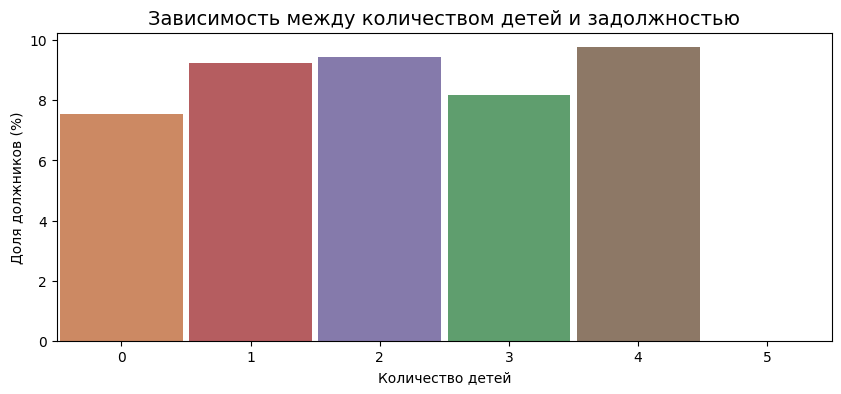

In [26]:
my_barplot(children_debt, "Зависимость между количеством детей и задолжностью")

**Вывод:** Можно выделить следующие зависимости между количеством детей и возвратом кредита в срок:
1. Клиенты не имеющие детей являются самыми надежными, задолжность по кредиту на 1-2% меньше чем у клиентов с детьми.
2. Среди всех клиентов имеющих детей, клиенты с 3 детьми являются самыми платежеспособными (на 1-1,5% среди всех клиентов с детьми).
3. Количество детей не сильно влияет на возможность возврата кредита в срок, среди клиентов с одним, думя и четыремя детьми -  разница не существенна, в районе 0,5%.
4. Клиенты с 5 детьми имеют 0% задолжности, однако выборка слишком маленькая (9 человек), чтобы делать надежные выводы по данной категории.

**Есть ли зависимость между семейным положением и возвратом кредита в срок?**

In [27]:
family_debt = my_pivot_table('family_status', 'Семейный статус', sort=True)
family_debt

,Всего кредитополучателей,Всего должников,Доля должников (%)
Семейный статус,,,
Не женат / не замужем,2796,273,9.76
гражданский брак,4134,385,9.31
женат / замужем,12261,927,7.56
в разводе,1189,84,7.06
вдовец / вдова,951,63,6.62


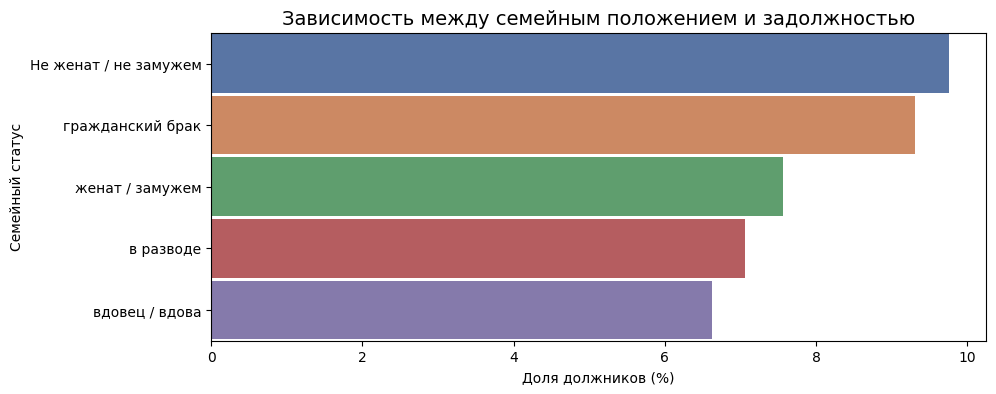

In [28]:
my_barplot(family_debt,
           "Зависимость между семейным положением и задолжностью",
           barh=True)

**Вывод:** Семейное положение значитиельно влияет на возврат кредита в срок:
1. Самая низкая платежеспособность наблюдается у клиентов в категориях "Не женат / не замужем" и "гражданский брак", процент задоложности 9,79% и 9,31%, соответственно, что существенно (приблизительно на 2%) больше чем у остальных категорий.
2. Самыми платежеспособными являются клиенты в категории "вдовец / вдова" с задолжностью в 6,62%, за ним, с небольшим отрывом идут клиенты в разводе - 7,06% и клиенты состоящие в браке - 7,56%. Разница между данными категориями меньше 1%.
3. Две (см. пункт №1) из пяти категории особенно сильно выделяются по платежеспособности и имеют общий признак, так что можно попробовать выделить две более общие категории:
    - Клиенты состоящие, либо состоявшие в официальном браке (средний уровень задолжности в 7.08%)
    - Клиенты не состоявшие в официальном браке (средний уровень задолжности в 9.53%)

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

In [29]:
income_debt = my_pivot_table('total_income_category', 'Категория дохода')
income_debt

,Всего кредитополучателей,Всего должников,Доля должников (%)
Категория дохода,,,
A,25,2,8.00
B,5014,354,7.06
C,15921,1353,8.50
D,349,21,6.02
E,22,2,9.09


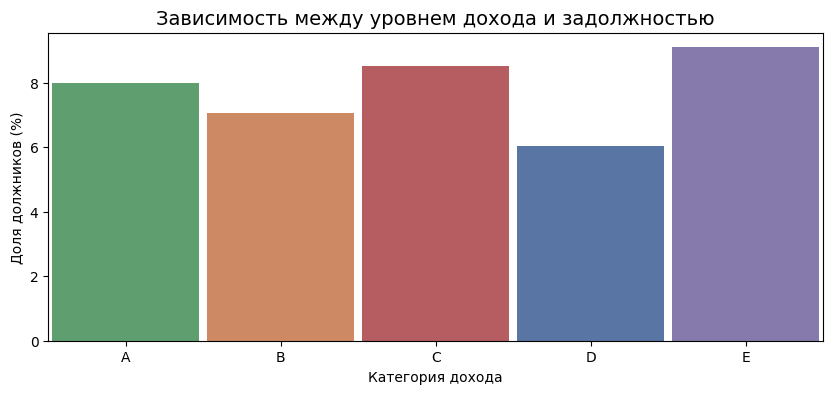

In [30]:
my_barplot(income_debt, "Зависимость между уровнем дохода и задолжностью")

**Категории доходов клиентов:**
- `'A'` — 1000001 и выше
- `'B'` — 200001–1000000
- `'C'` — 50001–200000
- `'D'` — 30001–50000
- `'E'` — 0–30000

**Вывод:**
В категориях `'A'` и `'E'` слишком маленькая выборка, чтобы делать надежные выводы, данные категории не будут учтены в результатах иследования.
1. Отличие уровня платежеспособности по кредиту от уровня дохода значительно, до 2,5% в зависимости от категории, однако нет четкой зависимости платежеспособности клиентов с **ростом** их дохода.
2. Самый маленький процент просрочки наблюдается у самой "бедной" категории клиентов - `'D'` (6,02%).
3. Процент просрочки по платежам у "средней" категории `'C'`, самый большой (8,5%).

**Как разные цели кредита влияют на его возврат в срок?**

In [31]:
purpose_debt = my_pivot_table('purpose_category', 'Цель кредита', sort=True)
purpose_debt

,Всего кредитополучателей,Всего должников,Доля должников (%)
Цель кредита,,,
операции с автомобилем,4279,400,9.35
получение образования,3988,369,9.25
проведение свадьбы,2313,183,7.91
операции с недвижимостью,10751,780,7.26


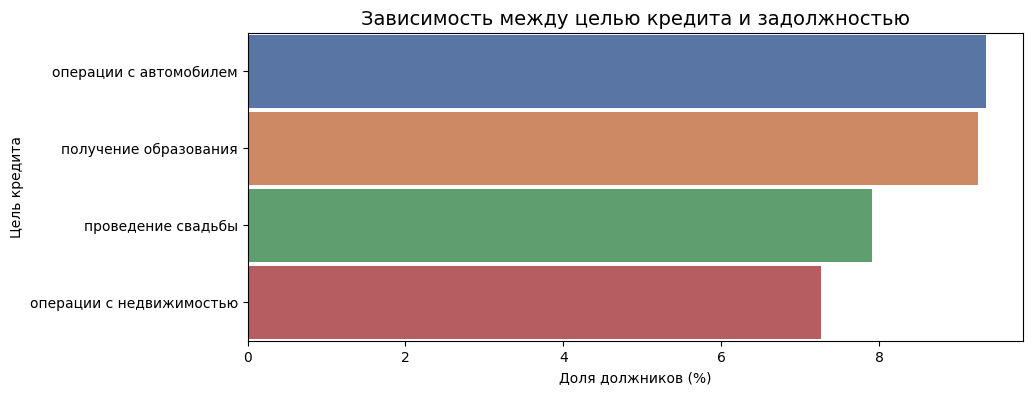

In [33]:
my_barplot(purpose_debt,
           "Зависимость между целью кредита и задолжностью",
           barh=True)

**Вывод:**
1. Кредиты на получение образования и операции с автомобилем сопостовимы по уровню просрочки (9,34% и 9,25% соостветственно) и сильно выбиваються по сравнерию с остальными категориями (на 1-1,5%).
2. Чаще всего в срок возвращают кредит категории "операции с недвижимостью" - 7,25% просрочки и "проведение свадьбы" - 7,91% просрочки.

**Какие возможные причины появления пропусков в исходных данных?**

**Ответ:**
1. Необязательные к заполнению поля
2. Человеческий фактор
3. Ошибки при записи данных
4. Баги в коде

**Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?**Ъ

**Ответ:**

Количественным переменным свойственны "выбросы" — данные, которые имеют слишком высокое или низкое значение по сравнению с другими данными и сильно могут влиять на объективность иследования. Например, зарплата одного сотрудника маленькой компании, которая на порядок выше чем у остальных сотрудников, может очень сильно исказить средний показатель, что скажется на объективности данных по зарплате в данной компании.   

## Общий вывод

Сильнее всего на возможность возврата кредита в срок влияют (по убыванию, по разнице между категориями):
1. Семейное положение (3,14%)
2. Уровень дохода (2,48%)
3. Количество детей (2,21%)
4. Цель кредита (2,09%)

"Идеальным" клиентом для банка, исходя из вышеперечисленных вопросов мог бы стать:
Вдовец / вдова, без детей, с уровнем дохода "D" (30001 - 50000), с кредитом на операции с недвижимостью.

"Не идеальным" клиентом для банка, мог бы стать:
Не женатый / не замужняя, с 4 детьми, с уровнем дохода "C" (50001 – 200000), с кредитом на операции с автомобилем.